In [7]:
import numpy as np

data = np.load('toluene.npz')
   
E = data['E'] 
R = data['R']

E -= E.min()

print(E.shape, R.shape)

(22140, 1) (22140, 15, 3)


In [8]:
from scipy.spatial.distance import pdist

D = np.array([1./pdist(r) for r in R])

print(D.shape)

(22140, 105)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(D, E, train_size=1000, random_state=0)

In [10]:
from krr import KRR

krr = KRR()
krr.train(X_train, y_train)

print('Best: alpha = {}, gamma = {}'.format(krr.best_params_['alpha'], krr.best_params_['gamma']))

Fitting 5 folds for each of 7000 candidates, totalling 35000 fits
Best: alpha = 1e-12, gamma = 0.005008407989848212


In [11]:
y_train_predicted = krr.predict(X_train)
y_test_predicted = krr.predict(X_test)

In [12]:
mae = lambda X, Y: np.mean(np.absolute((X - Y)))
rmse = lambda X, Y: np.sqrt(np.mean(np.square((X - Y))))

In [13]:
train_mae = mae(y_train_predicted, y_train)
train_rmse = rmse(y_train_predicted, y_train)
test_mae = mae(y_test_predicted, y_test)
test_rmse = rmse(y_test_predicted, y_test)

print('Train: MAE = {:.3f} kcal/mol, RMSE = {:.3f} kcal/mol'. format(train_mae, train_rmse))
print('Tset: MAE = {:.3f} kcal/mol, RMSE = {:.3f} kcal/mol'. format(test_mae, test_rmse))

Train: MAE = 0.001 kcal/mol, RMSE = 0.001 kcal/mol
Tset: MAE = 0.620 kcal/mol, RMSE = 0.803 kcal/mol


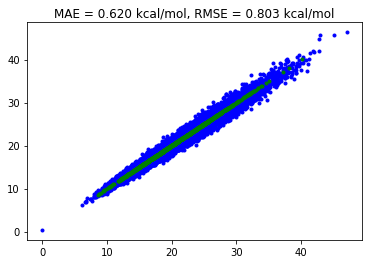

In [14]:
from matplotlib import pyplot as plt
 
plt.scatter(y_train, y_train_predicted, marker='.', color='green', zorder=2)
plt.scatter(y_test, y_test_predicted, marker='.', color='blue', zorder=1)
plt.title('MAE = {:.3f} kcal/mol, RMSE = {:.3f} kcal/mol'.format(test_mae, test_rmse))
plt.savefig('krr.png', dpi=600)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

alpha=np.logspace(-12, 0, 13)
clf = GridSearchCV(linear_model.Ridge(alpha=1), cv=5, param_grid={"alpha": alpha}, 
                   verbose=1, n_jobs=-1, scoring="neg_mean_squared_error")

clf.fit(X_train, y_train)

print('Best alpha: {:}'.format(clf.best_params_['alpha']))

y_train_predicted_clf = clf.predict(X_train)
y_test_predicted_clf = clf.predict(X_test)

train_mae_clf = mae(y_train_predicted_clf, y_train)
train_rmse_clf = rmse(y_train_predicted_clf, y_train)
test_mae_clf = mae(y_test_predicted_clf, y_test)
test_rmse_clf = rmse(y_test_predicted_clf, y_test)

print('Train: MAE = {:.3f} kcal/mol, RMSE = {:.3f} kcal/mol'. format(train_mae_clf, train_rmse_clf))
print('Tset: MAE = {:.3f} kcal/mol, RMSE = {:.3f} kcal/mol'. format(test_mae_clf, test_rmse_clf))

plt.scatter(y_train, y_train_predicted_clf, marker='.', color='green', zorder=2)
plt.scatter(y_test, y_test_predicted_clf, marker='.', color='blue', zorder=1)
plt.title('MAE = {:.3f} kcal/mol, RMSE = {:.3f} kcal/mol'.format(test_mae_clf, test_rmse_clf))
plt.savefig('rr.png', dpi=600)
plt.show()